In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn_extra.cluster import KMedoids
import scipy.stats as stats
from sklearn.metrics import davies_bouldin_score as dnn
import datetime as dt

In [2]:
fact_df=pd.read_excel("C:\\Users\\Nelson\\Documents\\ML_Dataset\\EXCEL-FILE-FOR-PROJECTS.xlsx",sheet_name="FactInternetSales")
dimp_df=pd.read_excel("C:\\Users\\Nelson\\Documents\\ML_Dataset\\EXCEL-FILE-FOR-PROJECTS.xlsx",sheet_name="DimProduct")
dims_df=pd.read_excel("C:\\Users\\Nelson\\Documents\\ML_Dataset\\EXCEL-FILE-FOR-PROJECTS.xlsx",sheet_name="DimSalesTerritory")
dimd_df=pd.read_excel("C:\\Users\\Nelson\\Documents\\ML_Dataset\\EXCEL-FILE-FOR-PROJECTS.xlsx",sheet_name="DimDate")
dimc_df=pd.read_excel("C:\\Users\\Nelson\\Documents\\ML_Dataset\\EXCEL-FILE-FOR-PROJECTS.xlsx",sheet_name="DimCustomer")
dimg_df=pd.read_excel("C:\\Users\\Nelson\\Documents\\ML_Dataset\\EXCEL-FILE-FOR-PROJECTS.xlsx",sheet_name="DimGeography")

In [3]:
fact_df.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,344,20050722,20050803,20050729,11000,1,6,9,SO43793,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2005-07-22,2005-08-03,2005-07-29
1,353,20070722,20070803,20070729,11000,2,6,9,SO51522,1,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
2,485,20070722,20070803,20070729,11000,1,6,9,SO51522,2,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
3,573,20071104,20071116,20071111,11000,1,6,9,SO57418,1,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,2007-11-04,2007-11-16,2007-11-11
4,541,20071104,20071116,20071111,11000,1,6,9,SO57418,2,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,2007-11-04,2007-11-16,2007-11-11


In [4]:
dimp_df.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,NaN,NaN,Adjustable Race,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
1,2,BA-8327,NaN,NaN,NaN,Bearing Ball,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
2,3,BE-2349,NaN,NaN,NaN,BB Ball Bearing,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
3,4,BE-2908,NaN,NaN,NaN,Headset Ball Bearings,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
4,5,BL-2036,NaN,NaN,NaN,Blade,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current


# # Data cleaning

In [5]:
fact_df.isna().sum()

ProductKey                   0
OrderDateKey                 0
DueDateKey                   0
ShipDateKey                  0
CustomerKey                  0
PromotionKey                 0
CurrencyKey                  0
SalesTerritoryKey            0
SalesOrderNumber             0
SalesOrderLineNumber         0
RevisionNumber               0
OrderQuantity                0
UnitPrice                    0
ExtendedAmount               0
UnitPriceDiscountPct         0
DiscountAmount               0
ProductStandardCost          0
TotalProductCost             0
SalesAmount                  0
TaxAmt                       0
Freight                      0
CarrierTrackingNumber    60398
CustomerPONumber         60398
OrderDate                    0
DueDate                      0
ShipDate                     0
dtype: int64

In [6]:
dimp_df.isna().sum()

ProductKey                 0
ProductAlternateKey        0
ProductSubcategoryKey    209
WeightUnitMeasureCode    324
SizeUnitMeasureCode      353
EnglishProductName         0
SpanishProductName       287
FrenchProductName        287
StandardCost             211
FinishedGoodsFlag          0
Color                    254
SafetyStockLevel           0
ReorderPoint               0
ListPrice                211
Size                     307
SizeRange                307
Weight                   324
DaysToManufacture          0
ProductLine              226
DealerPrice              211
Class                    276
Style                    305
ModelName                209
LargePhoto               606
EnglishDescription       210
FrenchDescription        210
ChineseDescription       210
ArabicDescription        210
HebrewDescription        210
ThaiDescription          210
GermanDescription        210
JapaneseDescription      210
TurkishDescription       210
StartDate                  0
EndDate       

In [7]:
fact_df.describe()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderLineNumber,RevisionNumber,...,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber
count,60398.000000,6.039800e+04,6.039800e+04,6.039800e+04,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.0,...,60398.000000,60398.0,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,0.0,0.0
mean,437.557932,2.007522e+07,2.007557e+07,2.007543e+07,18841.685420,1.041839,69.845326,6.244462,1.886321,1.0,...,486.086911,0.0,0.0,286.065657,286.065657,486.086911,38.886954,12.152217,NaN,NaN
std,118.088390,6.394891e+03,6.341781e+03,6.368323e+03,5432.430404,0.342605,42.146363,2.961150,1.016328,0.0,...,928.489892,0.0,0.0,552.457641,552.457641,928.489892,74.279193,23.212248,NaN,NaN
min,214.000000,2.005070e+07,2.005071e+07,2.005071e+07,11000.000000,1.000000,6.000000,1.000000,1.000000,1.0,...,2.290000,0.0,0.0,0.856500,0.856500,2.290000,0.183200,0.057300,NaN,NaN
25%,359.000000,2.007100e+07,2.007102e+07,2.007101e+07,14003.000000,1.000000,19.000000,4.000000,1.000000,1.0,...,7.950000,0.0,0.0,2.973300,2.973300,7.950000,0.636000,0.198800,NaN,NaN
50%,479.000000,2.008012e+07,2.008013e+07,2.008012e+07,18143.000000,1.000000,100.000000,7.000000,2.000000,1.0,...,29.990000,0.0,0.0,11.216300,11.216300,29.990000,2.399200,0.749800,NaN,NaN
75%,529.000000,2.008042e+07,2.008050e+07,2.008043e+07,23429.750000,1.000000,100.000000,9.000000,2.000000,1.0,...,539.990000,0.0,0.0,294.579700,294.579700,539.990000,43.199200,13.499800,NaN,NaN
max,606.000000,2.008073e+07,2.008081e+07,2.008081e+07,29483.000000,14.000000,100.000000,10.000000,8.000000,1.0,...,3578.270000,0.0,0.0,2171.294200,2171.294200,3578.270000,286.261600,89.456800,NaN,NaN


In [8]:
dimp_df.describe()

,ProductKey,ProductSubcategoryKey,StandardCost,SafetyStockLevel,ReorderPoint,ListPrice,Weight,DaysToManufacture,DealerPrice,LargePhoto
count,606.00000,397.000000,395.000000,606.000000,606.000000,395.000000,282.000000,606.000000,395.000000,0.0
mean,303.50000,12.128463,434.265829,495.201320,371.400990,747.661762,56.193227,1.201320,448.597060,NaN
std,175.08141,9.423328,497.379884,364.007114,273.005336,838.708451,158.000652,1.508893,503.225071,NaN
min,1.00000,1.000000,0.856500,4.000000,3.000000,2.290000,2.120000,0.000000,1.374000,NaN
25%,152.25000,2.000000,37.120900,100.000000,75.000000,69.990000,2.680000,0.000000,41.994000,NaN
50%,303.50000,13.000000,204.625100,500.000000,375.000000,364.090000,15.420000,1.000000,218.454000,NaN
75%,454.75000,16.000000,660.914200,1000.000000,750.000000,1204.324800,24.130000,1.000000,722.594900,NaN
max,606.00000,37.000000,2171.294200,1000.000000,750.000000,3578.270000,1050.000000,4.000000,2146.962000,NaN


In [9]:
dims_df.describe()

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryImage
count,11.000000,11.000000,0.0
mean,6.000000,5.000000,NaN
std,3.316625,3.316625,NaN
min,1.000000,0.000000,NaN
25%,3.500000,2.500000,NaN
50%,6.000000,5.000000,NaN
75%,8.500000,7.500000,NaN
max,11.000000,10.000000,NaN


In [10]:
dimd_df.describe()

,DateKey,DayNumberOfWeek,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
count,2.191000e+03,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2.007567e+07,4.000000,15.726609,183.083524,27.011867,6.523962,2.508900,2007.500228,1.503880,2.493382,2008.004108,1.496120
std,1.708201e+04,2.000457,8.800821,105.438536,15.067939,3.449207,1.117232,1.707859,0.500099,1.119290,1.779508,0.500099
min,2.005010e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,2005.000000,1.000000
25%,2.006070e+07,2.000000,8.000000,92.000000,14.000000,4.000000,2.000000,2006.000000,1.000000,1.000000,2007.000000,1.000000
50%,2.008010e+07,4.000000,16.000000,183.000000,27.000000,7.000000,3.000000,2008.000000,2.000000,2.000000,2008.000000,1.000000
75%,2.009070e+07,6.000000,23.000000,274.000000,40.000000,10.000000,4.000000,2009.000000,2.000000,3.000000,2010.000000,2.000000
max,2.010123e+07,7.000000,31.000000,366.000000,53.000000,12.000000,4.000000,2010.000000,2.000000,4.000000,2011.000000,2.000000


In [11]:
dimc_df.describe()

,CustomerKey,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,257.956287,57305.777970,1.844352,1.004058,0.676369,1.502705
std,5336.015523,196.531062,32285.841703,1.612408,1.522660,0.467874,1.138394
min,11000.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,15620.750000,62.000000,30000.000000,0.000000,0.000000,0.000000,1.000000
50%,20241.500000,240.000000,60000.000000,2.000000,0.000000,1.000000,2.000000
75%,24862.250000,345.000000,70000.000000,3.000000,2.000000,1.000000,2.000000
max,29483.000000,654.000000,170000.000000,5.000000,5.000000,1.000000,4.000000


In [12]:
dimg_df.describe()

,GeographyKey,SalesTerritoryKey
count,655.000000,655.000000
mean,328.000000,5.114504
std,189.226496,2.744027
min,1.000000,1.000000
25%,164.500000,3.000000
50%,328.000000,5.000000
75%,491.500000,7.000000
max,655.000000,10.000000


In [13]:
dimc_df.nunique()

CustomerKey             18484
GeographyKey              336
CustomerAlternateKey    18484
Title                       5
FirstName                 670
MiddleName                 44
LastName                  375
NameStyle                   1
BirthDate               10467
MaritalStatus               2
Suffix                      1
Gender                      2
EmailAddress            18484
YearlyIncome               16
TotalChildren               6
NumberChildrenAtHome        6
EnglishEducation            5
SpanishEducation            5
FrenchEducation             5
EnglishOccupation           5
SpanishOccupation           5
FrenchOccupation            5
HouseOwnerFlag              2
NumberCarsOwned             5
AddressLine1            12802
AddressLine2              166
Phone                    8890
DateFirstPurchase        1124
CommuteDistance             5
dtype: int64

In [14]:
fact_df['DiscountAmount'].nunique()

1

In [15]:
fact_df['ProductStandardCost']-fact_df['TotalProductCost']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
60393    0.0
60394    0.0
60395    0.0
60396    0.0
60397    0.0
Length: 60398, dtype: float64

In [16]:
dimp_df['Color'].value_counts()

Black           133
Red              63
Silver           52
Yellow           46
Blue             28
Multi            18
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

In [17]:
dimp_df.dtypes

ProductKey                        int64
ProductAlternateKey              object
ProductSubcategoryKey           float64
WeightUnitMeasureCode            object
SizeUnitMeasureCode              object
EnglishProductName               object
SpanishProductName               object
FrenchProductName                object
StandardCost                    float64
FinishedGoodsFlag                  bool
Color                            object
SafetyStockLevel                  int64
ReorderPoint                      int64
ListPrice                       float64
Size                             object
SizeRange                        object
Weight                          float64
DaysToManufacture                 int64
ProductLine                      object
DealerPrice                     float64
Class                            object
Style                            object
ModelName                        object
LargePhoto                      float64
EnglishDescription               object


In [91]:
fact_df.dtypes

ProductKey                        int64
OrderDateKey                      int64
DueDateKey                        int64
ShipDateKey                       int64
CustomerKey                       int64
PromotionKey                      int64
CurrencyKey                       int64
SalesTerritoryKey                 int64
SalesOrderNumber                 object
SalesOrderLineNumber              int64
RevisionNumber                    int64
OrderQuantity                     int64
UnitPrice                       float64
ExtendedAmount                  float64
UnitPriceDiscountPct              int64
DiscountAmount                    int64
ProductStandardCost             float64
TotalProductCost                float64
SalesAmount                     float64
TaxAmt                          float64
Freight                         float64
CarrierTrackingNumber           float64
CustomerPONumber                float64
OrderDate                datetime64[ns]
DueDate                  datetime64[ns]


In [92]:
dimc_df.loc[(dimc_df['EnglishOccupation'] =="Professional") & (dimc_df['EnglishEducation']=="Bachelors")]

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1962-12-23,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2005-07-22,1-2 Miles
1,11001,37,AW00011001,NaN,Eugene,L,Huang,False,1976-06-23,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2005-07-18,0-1 Miles
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,False,1966-08-19,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2005-07-10,2-5 Miles
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,False,1987-12-09,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2005-07-01,5-10 Miles
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,False,1990-06-06,S,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2005-07-26,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18390,29390,200,AW00029390,NaN,Summer,S,Rodriguez,False,1990-07-29,S,...,Professional,Profesional,Cadre,1,0,"159, avenue du Québec",NaN,1 (11) 500 555-0111,2007-02-03,0-1 Miles
18391,29391,155,AW00029391,NaN,Ebony,NaN,Chandra,False,1960-02-05,S,...,Professional,Profesional,Cadre,0,0,Potsdamer Straße 539,NaN,1 (11) 500 555-0154,2005-10-31,0-1 Miles
18392,29392,260,AW00029392,NaN,Tamara,B,Andersen,False,1992-03-02,M,...,Professional,Profesional,Cadre,1,0,5047 Northwood Dr.,NaN,1 (11) 500 555-0133,2008-06-10,0-1 Miles
18398,29398,168,AW00029398,NaN,Bruce,G,Suri,False,1963-02-26,S,...,Professional,Profesional,Cadre,0,0,Hansaallee 5989,NaN,1 (11) 500 555-0179,2005-10-13,0-1 Miles


In [93]:
dimc_df.loc[(dimc_df['TotalChildren'] ==2) & (dimc_df['NumberChildrenAtHome']==0)]

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1962-12-23,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2005-07-22,1-2 Miles
12,11012,611,AW00011012,NaN,Lauren,M,Walker,False,1995-02-25,M,...,Management,Gestión,Direction,1,2,4785 Scott Street,NaN,717-555-0164,2007-09-17,1-2 Miles
13,11013,543,AW00011013,NaN,Ian,M,Jenkins,False,1990-06-06,M,...,Management,Gestión,Direction,1,3,7902 Hudson Ave.,NaN,817-555-0185,2007-10-15,0-1 Miles
18,11018,32,AW00011018,NaN,Clarence,D,Rai,False,1985-06-26,S,...,Clerical,Administrativo,Employé,1,2,244 Rivewview,NaN,1 (11) 500 555-0137,2005-07-20,5-10 Miles
26,11026,4,AW00011026,NaN,Harold,NaN,Sai,False,1998-02-06,S,...,Clerical,Administrativo,Employé,0,2,8211 Leeds Ct.,NaN,1 (11) 500 555-0131,2005-07-26,1-2 Miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18450,29450,180,AW00029450,NaN,Bradley,R,Chande,False,1986-06-09,S,...,Manual,Obrero,Ouvrier,1,1,"1, place de Brazaville",NaN,1 (11) 500 555-0169,2007-03-20,1-2 Miles
18474,29474,174,AW00029474,NaN,Jaime,B,Raje,False,1995-04-29,M,...,Manual,Obrero,Ouvrier,0,1,Potsdamer Straße 646,NaN,1 (11) 500 555-0174,2005-12-20,0-1 Miles
18475,29475,147,AW00029475,NaN,Jared,A,Ward,False,1964-04-18,S,...,Manual,Obrero,Ouvrier,0,1,Erftplatz 876,NaN,1 (11) 500 555-0135,2005-12-30,2-5 Miles
18476,29476,147,AW00029476,NaN,Elizabeth,NaN,Bradley,False,1990-02-20,M,...,Manual,Obrero,Ouvrier,0,1,Nonnendamm 2,NaN,1 (11) 500 555-0177,2006-01-21,0-1 Miles


## Identifying the Territory with Maximum Sales

In [95]:
dims_df.drop(['SalesTerritoryImage'],axis=1,inplace=True)

In [96]:
data=fact_df.merge(dims_df,on='SalesTerritoryKey',how='inner')[['SalesTerritoryCountry','SalesAmount']]

In [97]:
max_territory=data.groupby(by=['SalesTerritoryCountry']).sum()

In [312]:
max_territory

,SalesAmount
SalesTerritoryCountry,
Australia,9.061001e+06
Canada,1.977845e+06
France,2.644018e+06
Germany,2.894312e+06
United Kingdom,3.391712e+06
United States,9.389790e+06


In [98]:
fact_df.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,344,20050722,20050803,20050729,11000,1,6,9,SO43793,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2005-07-22,2005-08-03,2005-07-29
1,353,20070722,20070803,20070729,11000,2,6,9,SO51522,1,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
2,485,20070722,20070803,20070729,11000,1,6,9,SO51522,2,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
3,573,20071104,20071116,20071111,11000,1,6,9,SO57418,1,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,2007-11-04,2007-11-16,2007-11-11
4,541,20071104,20071116,20071111,11000,1,6,9,SO57418,2,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,2007-11-04,2007-11-16,2007-11-11


## 	Sales on weekends vs weekdays


In [8]:
fact_df.rename({"OrderDateKey":"DateKey"},axis=1,inplace=True)
data_2=fact_df.merge(dimd_df,on='DateKey',how='inner')

In [9]:
sum_day_data=data_2.groupby(by=["DayNumberOfWeek"])["SalesAmount"].sum()

In [15]:
sum_day_data

DayNumberOfWeek
1    4.153093e+06
2    4.127215e+06
3    4.113749e+06
4    4.235386e+06
5    4.342674e+06
6    4.231642e+06
7    4.154920e+06
Name: SalesAmount, dtype: float64

In [10]:
weekday=sum(sum_day_data[1:6])
weekend=sum_day_data[1]+sum_day_data[7]

In [12]:
print(weekend)

8308012.476399999


## Determining the Weekday with Highest Average Sales

In [16]:
avg_day_data=data_2.groupby(by=["DayNumberOfWeek"])["SalesAmount"].mean()

In [17]:
avg_day_data

DayNumberOfWeek
1    488.369343
2    486.585092
3    478.565451
4    485.041891
5    485.269195
6    492.911072
7    485.955507
Name: SalesAmount, dtype: float64

In [103]:
dimp_df['Color'].value_counts()

Black           133
Red              63
Silver           52
Yellow           46
Blue             28
Multi            18
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

## Analyzing Customer Preference by Product Color

In [18]:
col=dimp_df.columns[dimp_df.isna().sum()==0]

In [19]:
col

Index(['ProductKey', 'ProductAlternateKey', 'EnglishProductName',
       'FinishedGoodsFlag', 'SafetyStockLevel', 'ReorderPoint',
       'DaysToManufacture', 'StartDate'],
      dtype='object')

In [20]:
prep_df=dimp_df[col]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
d1=dimp_df['EnglishProductName']
tf=TfidfVectorizer(analyzer="word",stop_words="english")
tf_wm=tf.fit_transform(d1)
f_names=tf.get_feature_names_out()
tf_df=pd.DataFrame(tf_wm.toarray(),columns=f_names)

In [22]:
tf_df

,10,100,1000,11,12,13,14,15,150,16,...,tube,vest,wash,washer,water,weatherproof,wheel,women,xl,yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
redtf_df=pca.fit_transform(tf_df)

In [24]:
redtf_df=pd.DataFrame(redtf_df,columns=pca.get_feature_names_out())

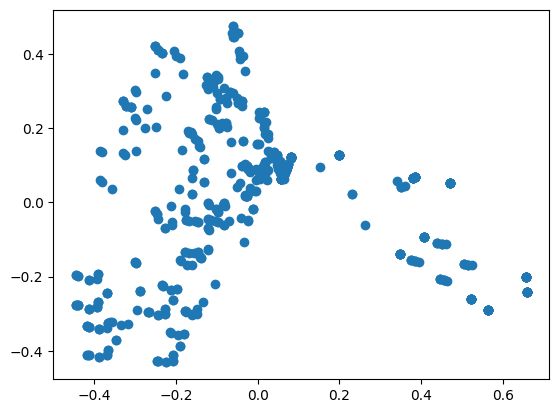

In [25]:
plt.scatter(redtf_df['pca0'],redtf_df['pca1'])
plt.show()

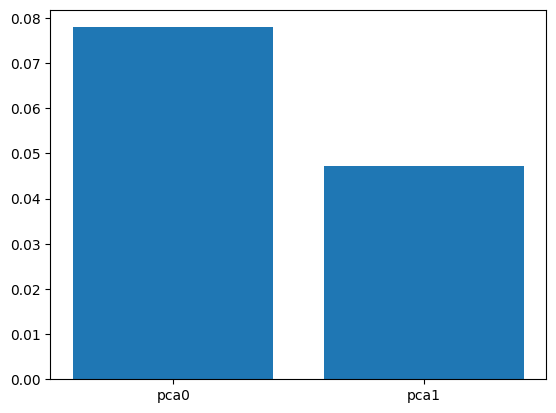

In [26]:
#Scree plot
plt.bar(pca.get_feature_names_out(),pca.explained_variance_ratio_)
plt.show()

In [27]:
prep_df

,ProductKey,ProductAlternateKey,EnglishProductName,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,DaysToManufacture,StartDate
0,1,AR-5381,Adjustable Race,False,1000,750,0,1998-06-01
1,2,BA-8327,Bearing Ball,False,1000,750,0,1998-06-01
2,3,BE-2349,BB Ball Bearing,False,800,600,1,1998-06-01
3,4,BE-2908,Headset Ball Bearings,False,800,600,0,1998-06-01
4,5,BL-2036,Blade,False,800,600,1,1998-06-01
...,...,...,...,...,...,...,...,...
601,602,BB-8107,ML Bottom Bracket,True,500,375,1,2007-07-01
602,603,BB-9108,HL Bottom Bracket,True,500,375,1,2007-07-01
603,604,BK-R19B-44,"Road-750 Black, 44",True,100,75,4,2007-07-01
604,605,BK-R19B-48,"Road-750 Black, 48",True,100,75,4,2007-07-01


In [28]:
prep_df.drop(['EnglishProductName'],axis=1,inplace=True)

C:\Users\Nelson\AppData\Local\Temp\ipykernel_4100\2057961353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_df.drop(['EnglishProductName'],axis=1,inplace=True)


In [29]:
prep_df.drop(['ProductAlternateKey'],axis=1,inplace=True)

C:\Users\Nelson\AppData\Local\Temp\ipykernel_4100\3331096616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_df.drop(['ProductAlternateKey'],axis=1,inplace=True)


In [30]:
prep_df

,ProductKey,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,DaysToManufacture,StartDate
0,1,False,1000,750,0,1998-06-01
1,2,False,1000,750,0,1998-06-01
2,3,False,800,600,1,1998-06-01
3,4,False,800,600,0,1998-06-01
4,5,False,800,600,1,1998-06-01
...,...,...,...,...,...,...
601,602,True,500,375,1,2007-07-01
602,603,True,500,375,1,2007-07-01
603,604,True,100,75,4,2007-07-01
604,605,True,100,75,4,2007-07-01


In [31]:
prep_df=pd.concat([prep_df,redtf_df],axis=1)

In [32]:
prep_df=prep_df.iloc[:,2:]
prep_df

,SafetyStockLevel,ReorderPoint,DaysToManufacture,StartDate,pca0,pca1
0,1000,750,0,1998-06-01,0.060018,0.067775
1,1000,750,0,1998-06-01,0.059639,0.067082
2,800,600,1,1998-06-01,0.059533,0.066872
3,800,600,0,1998-06-01,0.058475,0.069659
4,800,600,1,1998-06-01,0.058031,0.064000
...,...,...,...,...,...,...
601,500,375,1,2007-07-01,0.014808,0.092340
602,500,375,1,2007-07-01,-0.027227,0.097240
603,100,75,4,2007-07-01,-0.190901,-0.156179
604,100,75,4,2007-07-01,-0.188707,-0.158438


In [33]:
prep_df

,SafetyStockLevel,ReorderPoint,DaysToManufacture,StartDate,pca0,pca1
0,1000,750,0,1998-06-01,0.060018,0.067775
1,1000,750,0,1998-06-01,0.059639,0.067082
2,800,600,1,1998-06-01,0.059533,0.066872
3,800,600,0,1998-06-01,0.058475,0.069659
4,800,600,1,1998-06-01,0.058031,0.064000
...,...,...,...,...,...,...
601,500,375,1,2007-07-01,0.014808,0.092340
602,500,375,1,2007-07-01,-0.027227,0.097240
603,100,75,4,2007-07-01,-0.190901,-0.156179
604,100,75,4,2007-07-01,-0.188707,-0.158438


In [34]:
prep_df['StartDate']=(prep_df['StartDate']-pd.to_datetime('1995-06-01')).dt.days

In [35]:
prep_df

,SafetyStockLevel,ReorderPoint,DaysToManufacture,StartDate,pca0,pca1
0,1000,750,0,1096,0.060018,0.067775
1,1000,750,0,1096,0.059639,0.067082
2,800,600,1,1096,0.059533,0.066872
3,800,600,0,1096,0.058475,0.069659
4,800,600,1,1096,0.058031,0.064000
...,...,...,...,...,...,...
601,500,375,1,4413,0.014808,0.092340
602,500,375,1,4413,-0.027227,0.097240
603,100,75,4,4413,-0.190901,-0.156179
604,100,75,4,4413,-0.188707,-0.158438


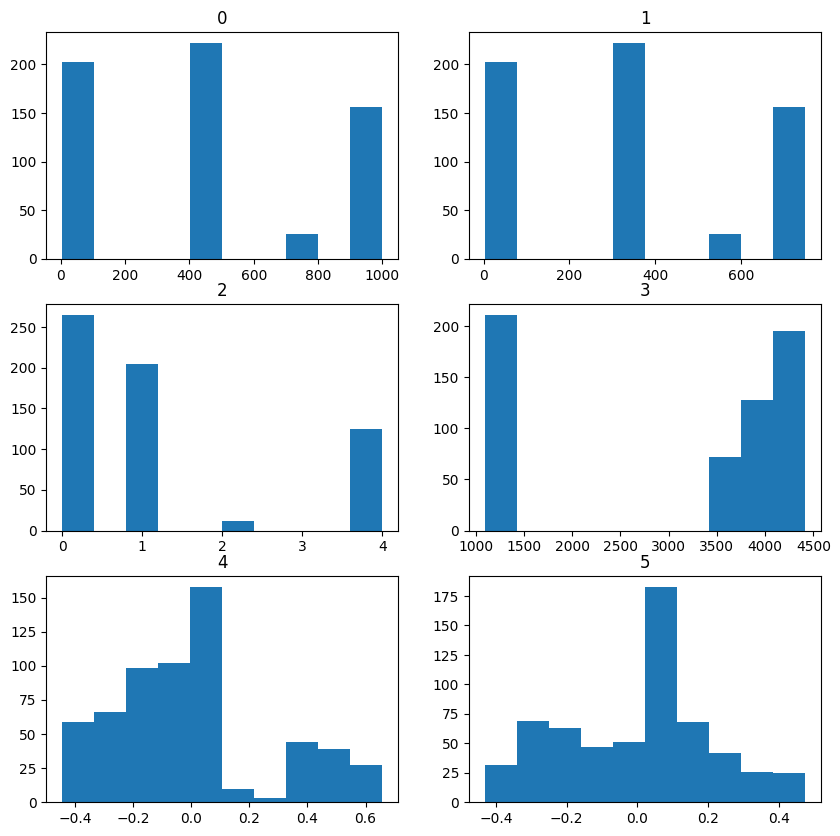

In [36]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10))

col_ind=0
for ind in range(3):
    for ind1 in range(2):
        #print((ind+1)*ind1)
        ax[ind,ind1].hist(prep_df.iloc[:,col_ind])
        ax[ind,ind1].set_title(col_ind)
        #ax[ind,ind1].plot(prep_df.iloc[:,col_ind])
        col_ind+=1

<Axes: xlabel='pca1', ylabel='Count'>

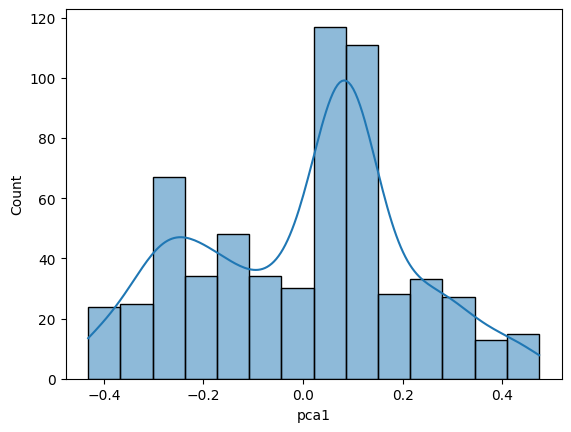

In [37]:
sns.histplot(prep_df['pca1'],kde=True)

In [38]:
prep_df

,SafetyStockLevel,ReorderPoint,DaysToManufacture,StartDate,pca0,pca1
0,1000,750,0,1096,0.060018,0.067775
1,1000,750,0,1096,0.059639,0.067082
2,800,600,1,1096,0.059533,0.066872
3,800,600,0,1096,0.058475,0.069659
4,800,600,1,1096,0.058031,0.064000
...,...,...,...,...,...,...
601,500,375,1,4413,0.014808,0.092340
602,500,375,1,4413,-0.027227,0.097240
603,100,75,4,4413,-0.190901,-0.156179
604,100,75,4,4413,-0.188707,-0.158438


In [39]:
redtf_df

,pca0,pca1
0,0.060018,0.067775
1,0.059639,0.067082
2,0.059533,0.066872
3,0.058475,0.069659
4,0.058031,0.064000
...,...,...
601,0.014808,0.092340
602,-0.027227,0.097240
603,-0.190901,-0.156179
604,-0.188707,-0.158438


In [40]:
def elbow(data):
    wcss=[]
    i=[]
    for ind in range(1,10):
        i.append(ind)
        model=KMedoids(n_clusters=ind,init="k-medoids++",random_state=42)
        model.fit(data)
        wcss.append(model.inertia_)
    plt.plot(i,wcss)

In [41]:
model=KMedoids(n_clusters=9,init="k-medoids++",random_state=42)
y=model.fit_predict(redtf_df)

In [42]:
#fig,ax=plt.subplots(nrows=1,ncols=2)
def plots(data1,data2):
    plt.subplot(2,2,1)
    sns.histplot(data1,kde=True)
    plt.subplot(2,2,2)
    stats.probplot(data1,plot=plt)
    plt.subplot(2,2,3)
    sns.histplot(data2,kde=True)
    plt.subplot(2,2,4)
    stats.probplot(data2,plot=plt)

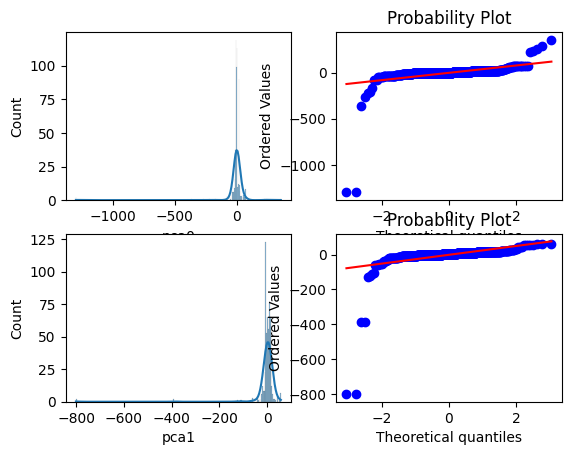

In [43]:
plots(1/redtf_df['pca0'],1/redtf_df['pca1'])

In [44]:
from sklearn.metrics import silhouette_score
round(silhouette_score(redtf_df,model.labels_),4)

0.4889

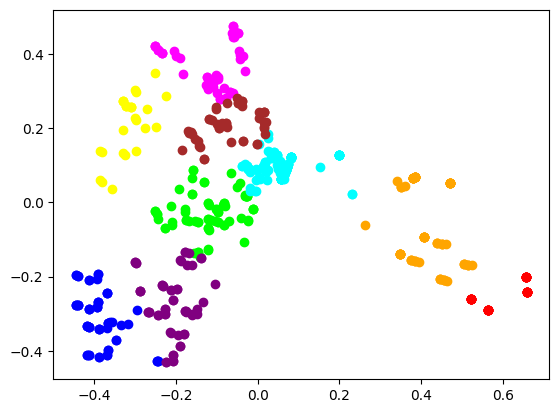

In [45]:
col = ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF', '#FFFF00', '#FFA500', '#800080', '#A52A2A']
for ind in range(0,9):
    plt.scatter(redtf_df[y==ind]["pca0"],redtf_df[y==ind]["pca1"],color=col[ind])

In [46]:
indices=dimp_df.loc[dimp_df['Color'].isna()].index

In [47]:
cl_index=redtf_df[y==1].index
dimp_df.iloc[cl_index]['Color'].value_counts()


Yellow          27
Black            7
Blue             6
Red              3
Silver/Black     3
Name: Color, dtype: int64

In [48]:
cluster_df=dimp_df.copy()

In [49]:
cluster_df=pd.concat([cluster_df,pd.DataFrame(y,columns=['Clusters'])],axis=1)

In [50]:
def fill(num):
    val=cluster_df.loc[(cluster_df['Clusters']==num)]['Color'].mode()[0]
    cluster_df.loc[(cluster_df['Color'].isna()) & (cluster_df['Clusters']==num),'Color']=cluster_df.loc[(cluster_df['Color'].isna()) & (cluster_df['Clusters']==num),'Color'].fillna(val)

In [51]:
fill(1)
fill(2)
fill(3)
fill(4)

In [52]:
fill(5)
fill(6)
fill(7)
fill(8)

In [53]:
cluster_df.dropna(axis=0,subset=['Color'],inplace=True)

In [54]:
cluster_df['Color'].isna().sum()

0

In [55]:
colan_df=fact_df.merge(cluster_df,how="inner",on="ProductKey")

In [57]:
colour_analysis=colan_df.groupby(by="Color")['SalesAmount'].sum()

# Customer buying behavior vs yearly income

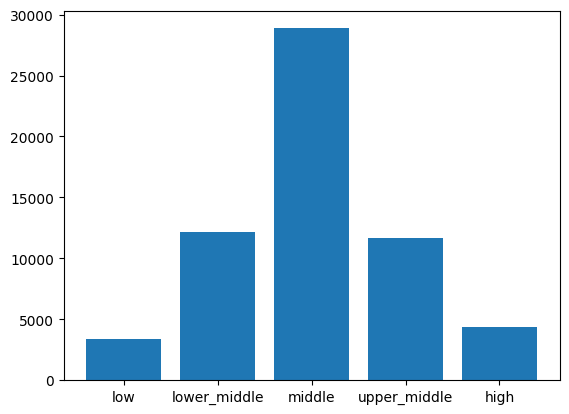

In [4]:
cust_trans=fact_df.merge(dimc_df,how="inner",on="CustomerKey")
low=cust_trans.loc[cust_trans['YearlyIncome']<20000].shape[0]
lower_middle=cust_trans.loc[(cust_trans['YearlyIncome']>=20000) & (cust_trans['YearlyIncome']<40000)].shape[0]
middle=cust_trans.loc[(cust_trans['YearlyIncome']>=40000) & (cust_trans['YearlyIncome']<80000)].shape[0]
upper_middle=cust_trans.loc[(cust_trans['YearlyIncome']>=80000) & (cust_trans['YearlyIncome']<120000)].shape[0]
high=cust_trans.loc[cust_trans['YearlyIncome']>=120000].shape[0]
plt.bar(['low','lower_middle','middle','upper_middle','high'],[low,lower_middle,middle,upper_middle,high])
plt.show()

## Are there any impact of quick delivery?

In [144]:
print("Difference beween Order & Due Date: ", (fact_df['DueDate']-fact_df['OrderDate']).min())
print("Difference between Ship & Order Date: ",(fact_df['ShipDate']-fact_df['OrderDate']).min())
print("Difference between Ship & Due Date: ", (fact_df['DueDate']-fact_df['ShipDate']).min())

Difference beween Order & Due Date:  12 days 00:00:00
Difference between Ship & Order Date:  7 days 00:00:00
Difference between Ship & Due Date:  5 days 00:00:00


## Total sales across different price category

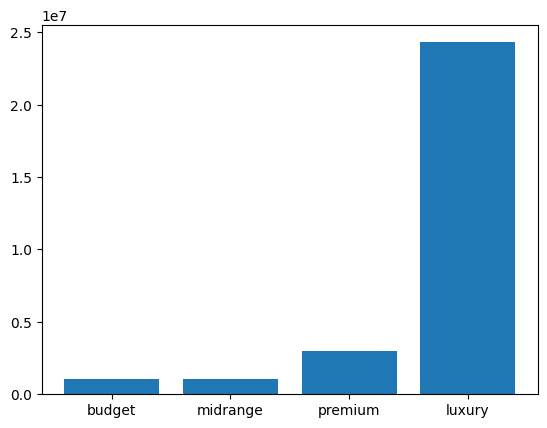

In [146]:
budget=fact_df.loc[fact_df['SalesAmount']<200,'SalesAmount'].sum()
midrange=fact_df.loc[(fact_df['SalesAmount']>=200) & (fact_df['SalesAmount']<600),'SalesAmount'].sum()
premium=fact_df.loc[(fact_df['SalesAmount']>=600) & (fact_df['SalesAmount']<1200),'SalesAmount'].sum()
luxury=fact_df.loc[fact_df['SalesAmount']>=1200,'SalesAmount'].sum()
plt.bar(['budget','midrange','premium','luxury'],[budget,midrange,premium,luxury])
plt.show()

In [147]:
age=dt.datetime.now().year-dimc_df['BirthDate'].dt.year

## Identifying the Predominant Customer Category

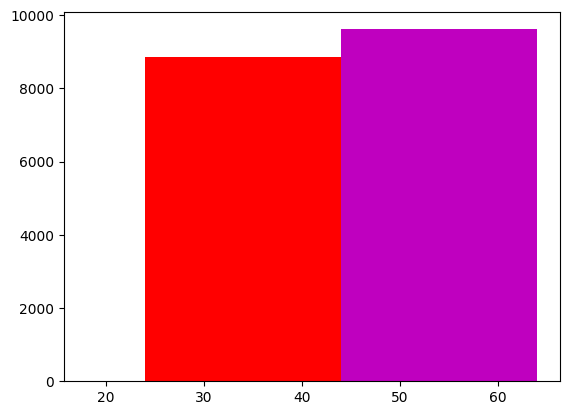

In [148]:
young_ad=age.loc[(age>=18) & (age<=24)].values
ad=age.loc[(age>=25) & (age<=44)].values
middle_age_ad=age.loc[(age>=45) & (age<=64)].values
senior=age.loc[age>65].values
conc_list=np.hstack([young_ad,ad,middle_age_ad,senior])
cnt,value,bar=plt.hist(conc_list,bins=[18,24,24,44,44,64])
color=['b','g','r','c','m','y']
for i,(a,b,c) in enumerate(zip(cnt,value,bar)):
    c.set_facecolor(color[i])

## Sales of products with muliple description vs products with single description

In [66]:
dimp_df.loc[dimp_df['SpanishProductName'].isna()]

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,NaN,NaN,Adjustable Race,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
1,2,BA-8327,NaN,NaN,NaN,Bearing Ball,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
2,3,BE-2349,NaN,NaN,NaN,BB Ball Bearing,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
3,4,BE-2908,NaN,NaN,NaN,Headset Ball Bearings,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
4,5,BL-2036,NaN,NaN,NaN,Blade,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-06-01,NaT,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,533,FR-M21B-48,12.0,LB,CM,"LL Mountain Frame - Black, 48",NaN,NaN,136.7850,True,...,使用与 ML 铝制车架相同的开创性车架技术，经济实惠。,إنها تأتي ضمن أفضل منتجاتنا فنيًا حيث تستخدم ن...,האיכות הטובה ביותר שלנו שמנצלת טכנולוגיית מסגר...,ความคุ้มค่าที่มาพร้อมกับเทคโนโลยีการออกแบบเฟรม...,Unser Topmodell mit derselben bahnbrechenden R...,ML アルミニウム フレームと同じ画期的なフレーム技術を利用した最高の製品。,ML alüminyum kadroyla aynı çığır açıcı kadro t...,2007-07-01,NaT,Current
533,534,FR-M21B-52,12.0,LB,CM,"LL Mountain Frame - Black, 52",NaN,NaN,136.7850,True,...,使用与 ML 铝制车架相同的开创性车架技术，经济实惠。,إنها تأتي ضمن أفضل منتجاتنا فنيًا حيث تستخدم ن...,האיכות הטובה ביותר שלנו שמנצלת טכנולוגיית מסגר...,ความคุ้มค่าที่มาพร้อมกับเทคโนโลยีการออกแบบเฟรม...,Unser Topmodell mit derselben bahnbrechenden R...,ML アルミニウム フレームと同じ画期的なフレーム技術を利用した最高の製品。,ML alüminyum kadroyla aynı çığır açıcı kadro t...,2007-07-01,NaT,Current
548,549,FR-M63S-38,12.0,LB,CM,"ML Mountain Frame-W - Silver, 38",NaN,NaN,199.3757,True,...,ML 车架是经过热处理的铝制车架，它的细节设计和质量与 HL 车架完全相同。它的性能卓越。属...,إن هيكل ML هو هيكل مصنوع من الألومنيوم مُعالج ...,מסגרת ה- ML היא מסגרת אלומיניום מוקשח בחום המי...,เฟรม ML เป็นเฟรมอลูมิเนียมผ่านความร้อน สร้างอย...,Der ML-Rahmen ist ein hitzebehandelter Alumini...,ML フレームは、HL フレームと同等の細部および品質を持つ熱処理アルミニウム フレームであ...,HL kadroyla aynı detaylara ve kaliteye sahip o...,2007-07-01,NaT,Current
549,550,FR-M21B-40,12.0,LB,CM,"LL Mountain Frame - Black, 40",NaN,NaN,136.7850,True,...,使用与 ML 铝制车架相同的开创性车架技术，经济实惠。,إنها تأتي ضمن أفضل منتجاتنا فنيًا حيث تستخدم ن...,האיכות הטובה ביותר שלנו שמנצלת טכנולוגיית מסגר...,ความคุ้มค่าที่มาพร้อมกับเทคโนโลยีการออกแบบเฟรม...,Unser Topmodell mit derselben bahnbrechenden R...,ML アルミニウム フレームと同じ画期的なフレーム技術を利用した最高の製品。,ML alüminyum kadroyla aynı çığır açıcı kadro t...,2007-07-01,NaT,Current


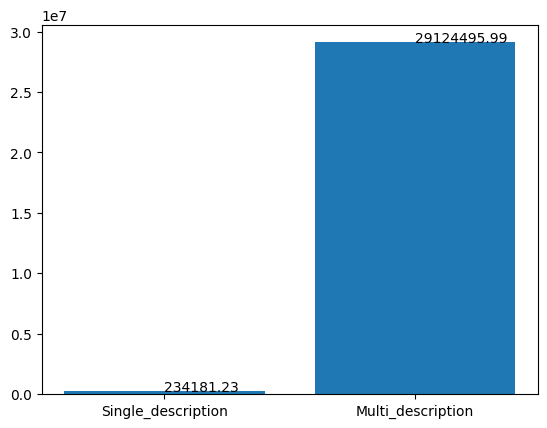

In [149]:
multi_desc=dimp_df.loc[~dimp_df['SpanishProductName'].isna()].merge(fact_df,how="inner",on="ProductKey")['SalesAmount'].sum()
sing_desc=dimp_df.loc[dimp_df['SpanishProductName'].isna()].merge(fact_df,how="inner",on="ProductKey")['SalesAmount'].sum()
b=plt.bar(["Single_description","Multi_description"],[sing_desc,multi_desc])
plt.annotate(round(b.datavalues[0],2),xy=(0,b.datavalues[0]+50))
plt.annotate(round(b.datavalues[1],2),xy=(1,b.datavalues[1]+50))
plt.show()

## Data distribution of the column 'Yearly income'

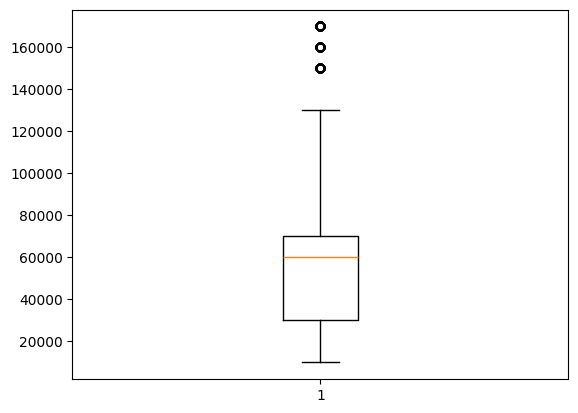

In [150]:
plt.boxplot(dimc_df['YearlyIncome'])
plt.show()

## How was the products with multiple descriptions influences the product price?

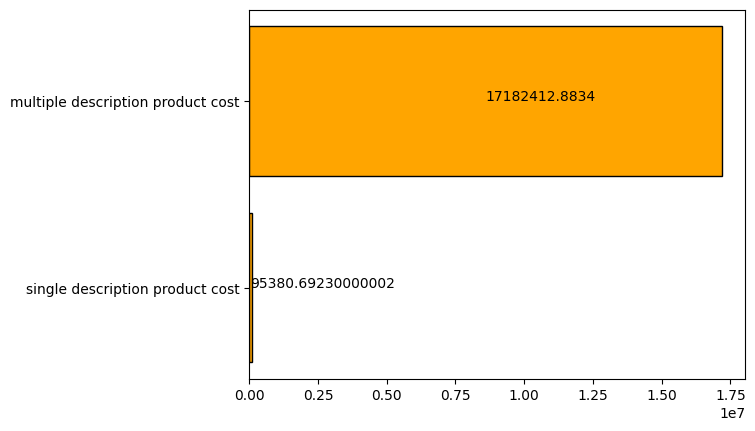

In [151]:
multi_desc_cost=dimp_df.loc[~dimp_df['SpanishProductName'].isna()].merge(fact_df,how="inner",on="ProductKey")['ProductStandardCost'].sum()
sing_desc_cost=dimp_df.loc[dimp_df['SpanishProductName'].isna()].merge(fact_df,how="inner",on="ProductKey")['ProductStandardCost'].sum()
b_values=plt.barh(["single description product cost","multiple description product cost"],[sing_desc_cost,multi_desc_cost],
         color="orange",edgecolor="k")
for ind,value in enumerate(b_values):
    plt.text(round(value.get_width()/2,2),ind,str(value.get_width()))

## Product size vs Sales

In [22]:
dimp_df['Size'].isna().sum()

307

In [23]:
dimp_df.Size

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
601    NaN
602    NaN
603     44
604     48
605     52
Name: Size, Length: 606, dtype: object

In [24]:
l=[]
for ind in dimp_df.Size:
    try:
        l.append(int(ind))
    except ValueError as v:
        continue

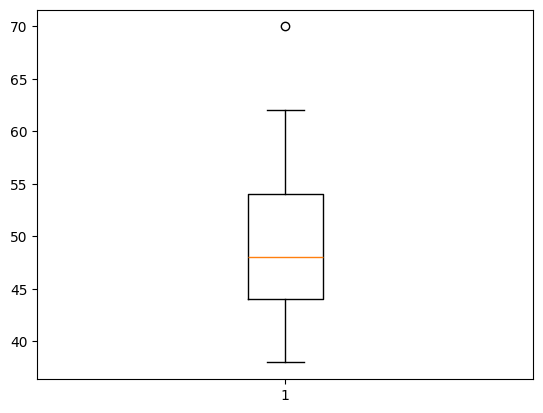

In [25]:
plt.boxplot(l)
plt.show()

In [26]:
copy_prod=dimp_df.copy()

In [27]:
sp_data=dimp_df['EnglishProductName'].apply(lambda x: str(x).split(' '))

In [28]:
for ind,val in enumerate(sp_data):
    try:
        if(len(val)>1):
            copy_prod['Size'][ind]=int(val[-1])
    except:
        print("empty: ",ind)

empty:  0
empty:  1
empty:  2
empty:  3
empty:  5
empty:  6
empty:  7
empty:  8
empty:  9
empty:  11
empty:  12
empty:  15
empty:  16
empty:  17
empty:  18
empty:  19
empty:  30
empty:  31
empty:  32
empty:  33
empty:  34
empty:  35
empty:  36
empty:  76
empty:  77
empty:  78
empty:  79
empty:  80
empty:  139
empty:  140
empty:  154
empty:  167
empty:  168
empty:  169
empty:  170
empty:  171
empty:  172
empty:  173
empty:  174
empty:  175
empty:  176
empty:  177
empty:  179
empty:  180
empty:  181
empty:  182
empty:  183
empty:  184
empty:  185
empty:  186
empty:  187
empty:  188
empty:  189
empty:  190
empty:  191
empty:  192
empty:  193
empty:  194
empty:  195
empty:  196
empty:  197
empty:  198
empty:  200
empty:  202
empty:  204
empty:  205
empty:  206
empty:  207
empty:  208
empty:  211
empty:  212
empty:  213
empty:  214
empty:  215
empty:  216
empty:  217
empty:  218
empty:  219
empty:  220
empty:  221
empty:  222
empty:  223
empty:  224
empty:  225
empty:  226
empty:  227
empty

C:\Users\Nelson\AppData\Local\Temp\ipykernel_20120\3997650983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_prod['Size'][ind]=int(val[-1])


In [29]:
copy_prod['Size'].isna().sum()

174

In [30]:
app_prod=copy_prod.query("Size in ['S','M','L','XL']")
hard_prod=copy_prod.query("Size not in ['S','M','L','XL']")

In [31]:
ord_data=np.array(app_prod['Size']).reshape(-1,1)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
app_prod['Size']=oe.fit_transform(ord_data)

C:\Users\Nelson\AppData\Local\Temp\ipykernel_20120\1039523686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_prod['Size']=oe.fit_transform(ord_data)


In [33]:
hard_prod.dropna(subset=['Size'],inplace=True)

C:\Users\Nelson\AppData\Local\Temp\ipykernel_20120\647476944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_prod.dropna(subset=['Size'],inplace=True)


## Apparel sales across different sizes

In [34]:
res_app

Size
L     93852.98
M     96242.02
S     87261.73
XL    42727.78
Name: SalesAmount, dtype: float64

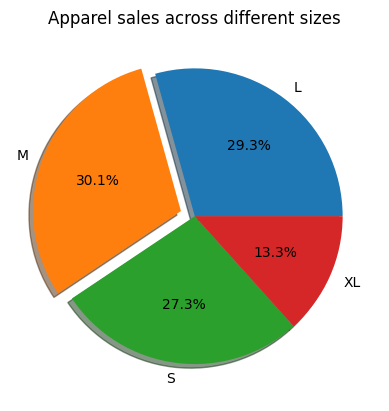

In [35]:
merge_app=app_prod.merge(fact_df,how='inner',on='ProductKey')
res_app=merge_app.groupby(by='Size')['SalesAmount'].sum()
plt.pie(res_app,labels=['L','M','S','XL'],explode = (0, 0.1, 0, 0),autopct="%1.1f%%",shadow=True)
plt.title("Apparel sales across different sizes")
plt.show()

## Hardware sales across different sizes

In [36]:
hard_prod['Size']=pd.to_numeric(hard_prod['Size'])

C:\Users\Nelson\AppData\Local\Temp\ipykernel_20120\1069103905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hard_prod['Size']=pd.to_numeric(hard_prod['Size'])


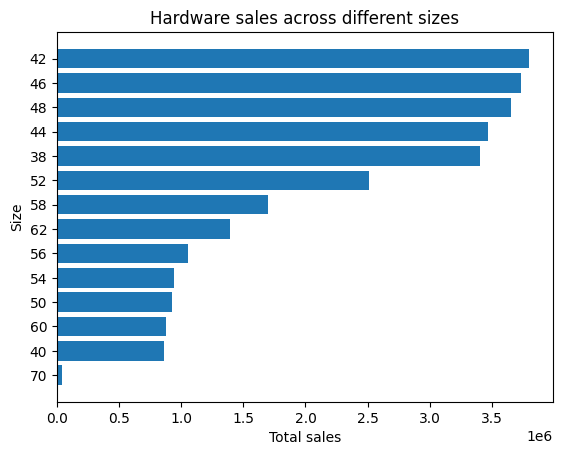

In [41]:
hard_app=hard_prod.merge(fact_df,how='inner',on='ProductKey')
res_hard1=hard_app.groupby(by='Size')['SalesAmount'].sum().round().sort_values()
plt.barh(['70', '40', '60', '50', '54', '56', '62', '58', '52', '38', '44', '48', '46', '42'],res_hard1.values)
plt.xlabel("Total sales")
plt.ylabel("Size")
plt.title("Hardware sales across different sizes")
plt.show()

## Days to manufacture vs standard cost

In [167]:
dimp_df['DaysToManufacture'].isna().sum()

0

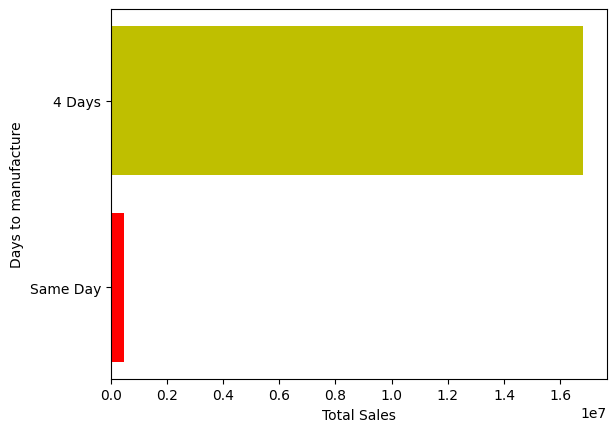

In [168]:
mergep_df=dimp_df.merge(fact_df,how="inner",on="ProductKey")
res_cost=mergep_df.groupby(by="DaysToManufacture")['ProductStandardCost'].sum()
b_p=plt.barh(["Same Day","4 Days"],res_cost.values,color=['r','y'])
plt.xlabel("Total Sales")
plt.ylabel("Days to manufacture")
plt.show()

## Festival performance over the years (Only Christmas & New year)

In [19]:
Fest_sales1

,ProductKey,DateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,EnglishMonthName,SpanishMonthName,FrenchMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
56,573,20071104,20071116,20071111,11000,1,6,9,SO57418,1,...,November,Noviembre,Novembre,11,4,2007,2,2,2008,1
57,541,20071104,20071116,20071111,11000,1,6,9,SO57418,2,...,November,Noviembre,Novembre,11,4,2007,2,2,2008,1
58,530,20071104,20071116,20071111,11000,1,6,9,SO57418,3,...,November,Noviembre,Novembre,11,4,2007,2,2,2008,1
59,214,20071104,20071116,20071111,11000,1,6,9,SO57418,4,...,November,Noviembre,Novembre,11,4,2007,2,2,2008,1
60,488,20071104,20071116,20071111,11000,1,6,9,SO57418,5,...,November,Noviembre,Novembre,11,4,2007,2,2,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,314,20051102,20051114,20051109,28653,1,100,4,SO44578,1,...,November,Noviembre,Novembre,11,4,2005,2,2,2006,1
60394,312,20051102,20051114,20051109,28662,1,100,4,SO44579,1,...,November,Noviembre,Novembre,11,4,2005,2,2,2006,1
60395,314,20051102,20051114,20051109,28667,1,100,1,SO44577,1,...,November,Noviembre,Novembre,11,4,2005,2,2,2006,1
60396,312,20051210,20051222,20051217,28828,1,100,4,SO44873,1,...,December,Diciembre,Décembre,12,4,2005,2,2,2006,1


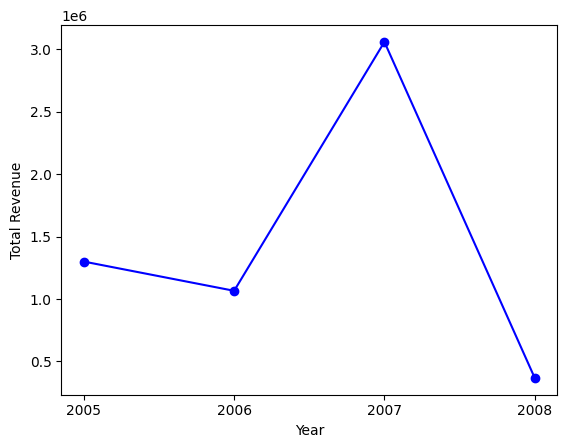

In [20]:
Fest_sales1=data_2.loc[(data_2['MonthNumberOfYear']==11) | (data_2['MonthNumberOfYear']==12)]
Fest_sales2=data_2.loc[(data_2['MonthNumberOfYear']==1) & (data_2['DayNumberOfMonth']<10)]
Fest_sales=pd.concat([Fest_sales1,Fest_sales2])
res_data=Fest_sales.groupby(by="CalendarYear")["SalesAmount"].sum()
plt.plot(res_data,'bo-')
plt.xticks([2005,2006,2007,2008])
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

In [170]:
Non_sales=data_2.loc[(data_2['MonthNumberOfYear']>1) & (data_2['MonthNumberOfYear']<12)].groupby(by="CalendarYear")["SalesAmount"].sum()

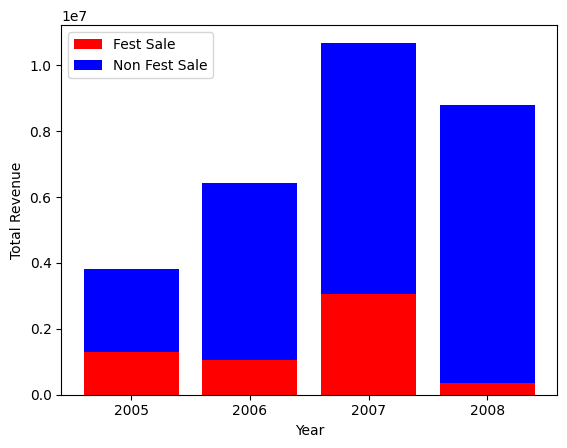

In [171]:
plt.bar([2005,2006,2007,2008],res_data.values,color='r',label="Fest Sale")
plt.bar([2005,2006,2007,2008],Non_sales.values,bottom=res_data.values,color='b',label="Non Fest Sale")
plt.xticks([2005,2006,2007,2008])
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.legend()

## Half yearly, Quarterly sales

In [172]:
quarter=data_2.groupby(by=["CalendarYear","CalendarQuarter"])['SalesAmount'].sum()

In [173]:
quarter

CalendarYear  CalendarQuarter
2005          3                  1.453523e+06
              4                  1.812851e+06
2006          1                  1.791698e+06
              2                  2.014012e+06
              3                  1.396834e+06
              4                  1.327799e+06
2007          1                  1.413530e+06
              2                  1.623971e+06
              3                  2.744340e+06
              4                  4.009218e+06
2008          1                  4.283630e+06
              2                  5.436429e+06
              3                  5.084063e+04
Name: SalesAmount, dtype: float64

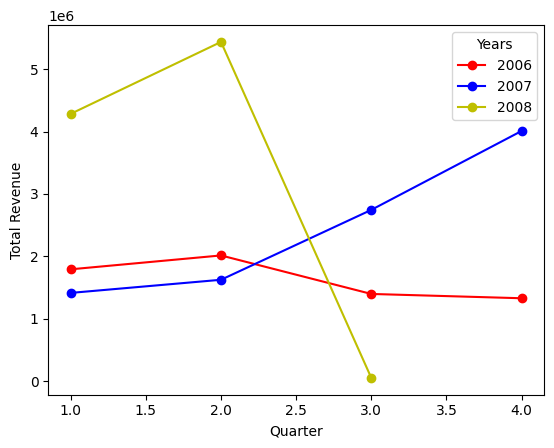

In [174]:
plt.plot(quarter[2006][:],'ro-',label='2006')
plt.plot(quarter[2007][:],'bo-',label='2007')
plt.plot(quarter[2008][:],'yo-',label='2008')
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.legend(title="Years")
plt.show()

In [175]:
half=data_2.groupby(by=["CalendarYear","CalendarSemester"])['SalesAmount'].sum()

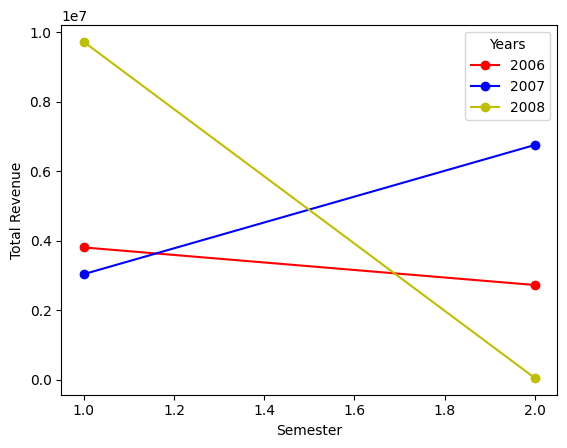

In [176]:
plt.plot(half[2006][:],'ro-',label='2006')
plt.plot(half[2007][:],'bo-',label='2007')
plt.plot(half[2008][:],'yo-',label='2008')
plt.xlabel("Semester")
plt.ylabel("Total Revenue")
plt.legend(title="Years")
plt.show()

## Analysis of Customer Sign-Ups by Year

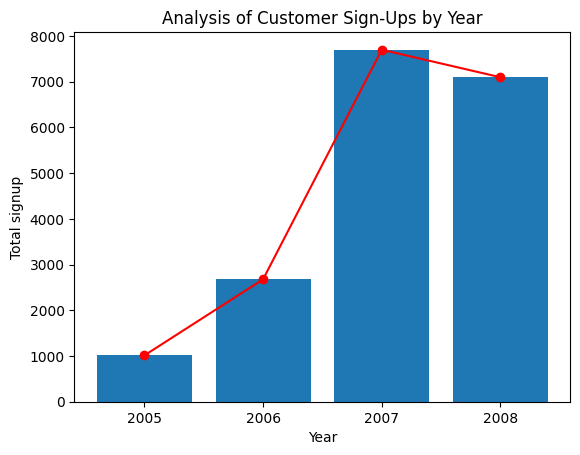

In [177]:
first_purchase=dimc_df['DateFirstPurchase'].dt.year.reset_index(name="Year")
cust_count=first_purchase.groupby(by="Year")['Year'].count()
plt.bar(['2005','2006','2007','2008'],cust_count.values)
plt.plot(['2005','2006','2007','2008'],cust_count.values,'ro-')
plt.xlabel("Year")
plt.ylabel("Total signup")
plt.title("Analysis of Customer Sign-Ups by Year")
plt.show()

## Heatmap Analysis of Customer Locations

In [178]:
geo_loc=dimc_df.merge(dimg_df,how="inner",on="GeographyKey")
geo_count=geo_loc.groupby(by="City")['CustomerKey'].count()

In [179]:
fact_df.head()

,ProductKey,DateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,344,20050722,20050803,20050729,11000,1,6,9,SO43793,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2005-07-22,2005-08-03,2005-07-29
1,353,20070722,20070803,20070729,11000,2,6,9,SO51522,1,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
2,485,20070722,20070803,20070729,11000,1,6,9,SO51522,2,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,2007-07-22,2007-08-03,2007-07-29
3,573,20071104,20071116,20071111,11000,1,6,9,SO57418,1,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,2007-11-04,2007-11-16,2007-11-11
4,541,20071104,20071116,20071111,11000,1,6,9,SO57418,2,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,2007-11-04,2007-11-16,2007-11-11


## Tax amount influence on product purchase

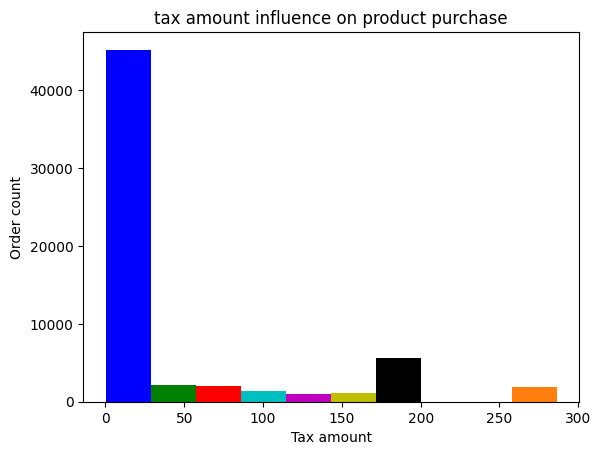

In [4]:
g=fact_df.groupby(by=["ProductKey","TaxAmt"])['ProductKey'].count()
x=pd.DataFrame(data={"index":g.index.get_level_values(1),"count":g.values})
a,b,c=plt.hist(x['index'],weights=x['count'])
plt.xlabel("Tax amount")
plt.ylabel("Order count")
plt.title("tax amount influence on product purchase")
color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:blue', 'tab:orange', 'tab:green']
for ind,(f,g,h) in enumerate(zip(a,b,c)):
    h.set_facecolor(color[ind])

## In their income how much they're spending for us?

In [5]:
low_cat=cust_trans.loc[cust_trans['YearlyIncome']<20000]
lower_middle_cat=cust_trans.loc[(cust_trans['YearlyIncome']>=20000) & (cust_trans['YearlyIncome']<40000)]
middle_cat=cust_trans.loc[(cust_trans['YearlyIncome']>=40000) & (cust_trans['YearlyIncome']<80000)]
upper_middle_cat=cust_trans.loc[(cust_trans['YearlyIncome']>=80000) & (cust_trans['YearlyIncome']<120000)]
high_cat=cust_trans.loc[cust_trans['YearlyIncome']>=120000]

In [6]:
l_s=low_cat['SalesAmount'].sum()
l_m_s=lower_middle_cat['SalesAmount'].sum()
m_s=middle_cat['SalesAmount'].sum()
u_s=upper_middle_cat['SalesAmount'].sum()
h_s=high_cat['SalesAmount'].sum()
l_i=low_cat['YearlyIncome'].sum()-l_s
l_m_i=lower_middle_cat['YearlyIncome'].sum()-l_m_s
m_i=middle_cat['YearlyIncome'].sum()-m_s
u_i=upper_middle_cat['YearlyIncome'].sum()-u_s
h_i=high_cat['YearlyIncome'].sum()-h_s

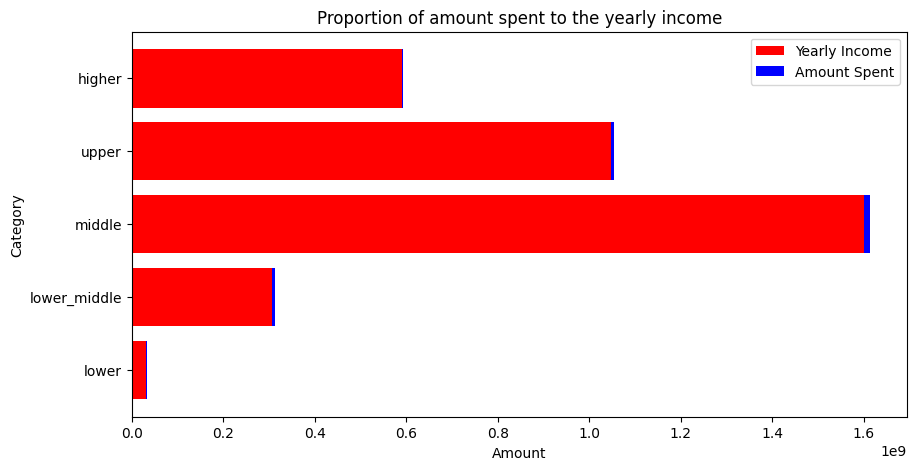

In [299]:
plt.figure(figsize=(10,5))
a=plt.barh(['lower','lower_middle','middle','upper','higher'],[l_i,l_m_i,m_i,u_i,h_i],color='r',label="Yearly Income")
plt.barh(['lower','lower_middle','middle','upper','higher'],[l_s,l_m_s,m_s,u_s,h_s],left=[l_i,l_m_i,m_i,u_i,h_i],color='b',label="Amount Spent")
#plt.bar_label(a,labels=["hi","heloo"])
plt.xlabel("Amount")
plt.ylabel("Category")
plt.title("Proportion of amount spent to the yearly income")
plt.legend()
plt.show()

## 	Does having more cars boost the quantity of products?

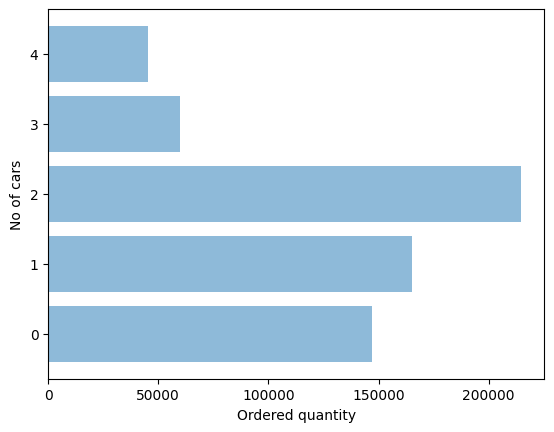

In [305]:
cars=cust_trans.groupby(by="NumberCarsOwned")['OrderQuantity'].sum()
plt.barh(cars.index,cars.values,alpha=0.5)
plt.xlabel("Ordered quantity")
plt.ylabel("No of cars")
plt.show()